### Exploratory Data Analysis on the Cleaned Data Set

This notebook is to perform an exploratory data analysis on the cleaned data set.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import datetime as dt
from datetime import datetime
import os


Initial cleaning includes eliminating SummaryofDay and SummaryofMonth columns. The character values are replaced with numeric to make the data consistent and numeric. The dataset now contains only the Hourly data columns

## Import the clean dataset in pandas dataframe

In [ ]:
IPATH = os.environ['WRANGLEPATH']+"/"
dataRB=pd.read_csv(IPATH+"CleanDataStaticEDA.csv", dtype='object')

In [4]:
dataRB.describe()

,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,DATE,REPORTTPYE,HOURLYSKYCONDITIONS,HOURLYVISIBILITY,HOURLYPRSENTWEATHERTYPE,...,HOURLYWindDirection,HOURLYWindGustSpeed,HOURLYStationPressure,HOURLYPressureTendency,HOURLYPressureChange,HOURLYSeaLevelPressure,HOURLYPrecip,HOURLYAltimeterSetting,DAILYSunrise,DAILYSunset
count,720236,720236,720236,720236,720236,720236,720236,381854,694444,184568,...,716770,72303,664064,166941,140529,663835,598988,449918,720236,720236
unique,1,1,1,1,1,720236,8,77214,122,904,...,52,60,259,9,81,292,140,255,181,186
top,WBAN:14739,BOSTON MA US,3.7,42.3606,-71.0097,2010-04-08 17:54:00,SAO,250,14.91,||FG:45,...,270.0,23.0,30.0,8.0,-0.01,29.94,0.0,30.0,407,1925
freq,720236,720236,720236,720236,720236,1,396501,11214,182926,31828,...,32994,7139,11636,33010,16286,13799,520740,7899,29966,21551


# DATE

In [45]:
dataRB['DATE'] =  pd.to_datetime(dataRB['DATE'])

In [46]:

full_range = pd.date_range(dataRB['DATE'].min(), dataRB['DATE'].max())
missing_dates = full_range[~full_range.isin(dataRB['DATE'])]


In [ ]:
dataRB['DATE'].value_counts().plot(kind='bar')

# HOURLYSKYCONDITIONS                  

sky conditions cannot be assumed but a model can be build based on othe parameters to estimate the type of sky.

 null values cannot be estimated by standard data cleaning techniques as it contains multiple value types in single row

 according to values mostly the skyconditions appear as [CLR clear]

In [23]:
df=dataRB['HOURLYSKYCONDITIONS'].value_counts(sort=True, ascending=False)
df

250                                 11214
CLR:00                              10521
FEW:02 250                           5185
OVC:08 4                             3024
OVC:08 5                             2867
50                                   2708
OVC:08 3                             2660
OVC:08 6                             2508
FEW:02 722                           2307
40                                   2241
OVC:08 8                             1970
OVC:08 7                             1969
100                                  1834
FEW:02 50                            1772
BKN:07 250                           1664
FEW:02 60                            1623
150  250                             1606
SCT:04 250                           1568
OVC:08 9                             1551
OVC:08 722                           1521
60                                   1507
BKN:06 722                           1489
30                                   1467
120                               

# HOURLYPRSENTWEATHERTYPE              


weather type cannot be assumed but a model can be build based on othe parameters to estimate the type of weather 

In [82]:
dataRB['HOURLYPRSENTWEATHERTYPE'].value_counts()

||FG:45                                          31828
||FG:45 RA:61                                    15601
||RA:61                                          15500
||HZ:05                                          14904
||FU:04                                          10900
||FG:45 DZ:51                                     8725
||SHRA:80                                         8038
||FU:04 HZ:05                                     7661
BR:1 ||                                           6806
-RA:02 BR:1 |RA:61 |RA:61                         4010
-SN:03 BR:1 |SN:71 |                              3508
-RA:02 |RA:61 |RA:61                              3388
||FG:45 SHRA:80                                   3186
||FG:45 RA:63                                     2840
||FG:45 DZ:51 RA:61                               2341
-RA:02 BR:1 |RA:61 |                              2330
||SHSN:85                                         2168
||HZ:05 FG:45                                     2160
||FU:04 FG

  # HOURLYDRYBULBTEMPF and HOURLYDRYBULBTEMPC

Missing values are interpolated where ever previous and next value is available. But we still have bulk missing values which cannot be solved by interpolation as it distorts the data and has to cleaned with other strategies.
Character values and adjusted values have been eliminated.

In [26]:
# unique values: contains * and character values.
dataRB.HOURLYDRYBULBTEMPF.unique()

array(['41.0', '39.0', '38.0', '36.0', '37.0', '46.0', '48.0', '47.0',
       '44.0', '51.0', '54.0', '57.0', '59.0', '61.0', '58.0', '56.0',
       '45.0', '43.0', '49.0', '42.0', '40.0', '50.0', '52.0', '17.0',
       '14.0', '12.0', '11.0', '9.0', '10.0', '13.0', '15.0', '18.0',
       '35.0', '33.0', '31.0', '28.0', '30.0', '29.0', '27.0', '26.0',
       '32.0', '34.0', '8.0', '7.0', '6.0', '5.0', '16.0', '25.0', '20.0',
       '19.0', '24.0', '23.0', '21.0', '53.0', '62.0', '64.0', '63.0',
       '55.0', '60.0', '76.0', '75.0', '78.0', '79.0', '86.0', '84.0',
       '81.0', '73.0', '69.0', '66.0', '65.0', '67.0', '74.0', '77.0',
       '80.0', '72.0', '85.0', '82.0', '71.0', '70.0', '68.0', '83.0',
       '87.0', '90.0', '91.0', '89.0', '92.0', '93.0', '22.0', '4.0',
       '2.0', '1.0', '0.0', '-1.0', '-2.0', '-3.0', '-4.0', '95.0', '96.0',
       '88.0', '94.0', '3.0', '97.0', '98.0', '99.0', '100.0', nan, '-5.0',
       '-6.0', '-7.0', '-9.0', '-10.0', '-12.0', '-11.0', '102.0'

In [35]:
#value_counts
dataRB['HOURLYDRYBULBTEMPF'].value_counts()

63     14401
64     14146
37     13950
66     13904
50     13766
39     13664
34     13659
45     13622
36     13430
70     13400
43     13338
57     13296
48     13263
54     13186
61     13168
55     13149
68     13142
40     13028
46     13024
41     12819
52     12602
65     12565
42     12492
38     12260
60     12104
67     12049
47     12030
62     11913
59     11890
69     11766
       ...  
55s        2
75s        2
76s        2
73s        2
47s        2
53s        2
66s        2
78s        2
-12        2
51s        1
72s        1
90s        1
79s        1
4s         1
64s        1
91s        1
50s        1
77s        1
74s        1
63s        1
38s        1
42s        1
43s        1
-11        1
44s        1
34s        1
59s        1
-9s        1
-10        1
3s         1
Name: HOURLYDRYBULBTEMPF, dtype: int64

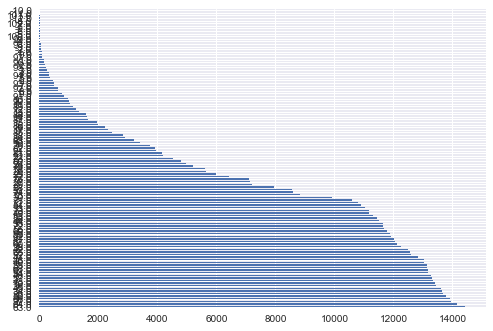

In [95]:
dataRB['HOURLYDRYBULBTEMPF'].value_counts().plot(kind='barh')
plt.show()

In [28]:
 df=dataRB[['HOURLYDRYBULBTEMPF']].convert_objects(convert_numeric=True)

C:\Users\Manasi\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning:

convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.



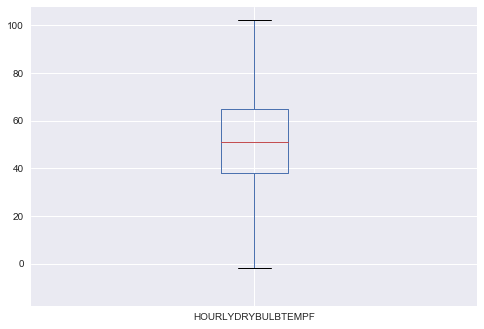

In [29]:
# boxplot 
df.plot(kind='box')
plt.show()

In [30]:
dataRB.HOURLYDRYBULBTEMPC.unique()

array(['5.2', '4.1', '3.5', '2.4', '3.0', '8.0', '9.1', '8.5', '6.9',
       '10.7', '12.4', '14.1', '15.2', '16.3', '14.6', '13.5', '7.4',
       '6.3', '9.6', '5.8', '4.6', '10.2', '11.3', '-8.1', '-9.8', '-10.9',
       '-11.5', '-12.6', '-12.0', '-10.3', '-9.2', '-7.6', '1.9', '0.8',
       '-0.4', '-2.0', '-0.9', '-1.5', '-2.6', '-3.1', '0.2', '1.3',
       '-13.1', '-13.7', '-14.2', '-14.8', '-8.7', '-3.7', '-6.5', '-7.0',
       '-4.2', '-4.8', '-5.9', '11.9', '16.9', '18.0', '17.4', '13.0',
       '15.7', '24.6', '24.1', '25.7', '26.3', '30.2', '29.1', '27.4',
       '23.0', '20.7', '19.1', '18.5', '19.6', '23.5', '25.2', '26.8',
       '22.4', '29.6', '28.0', '21.8', '21.3', '20.2', '28.5', '30.7',
       '32.4', '32.9', '31.8', '33.5', '34.1', '6.1', '7.2', '8.9', '11.1',
       '12.8', '15.0', '13.9', '10.0', '5.0', '3.3', '2.2', '1.7', '1.1',
       '0.6', '-1.1', '-1.7', '-0.6', '-2.8', '-3.9', '-4.4', '-5.0',
       '-5.6', '-6.7', '-7.2', '-7.8', '-8.3', '-8.9', '-3.3', 

In [31]:
dataRB.HOURLYDRYBULBTEMPC.isnull().sum()

24258

# HOURLYWETBULBTEMPF & C

Wetbulb temperature is calculated using drybulb and dewpoint reducing the null values from 83139 to 36606. The charater values are stripped, and nan values are interpolated wherever possible. Has bulk missing value issues.            

In [42]:
dataRB['HOURLYWETBULBTEMPF'].value_counts()

63     14447
62     14319
64     14065
38     14030
61     13548
65     13482
33     13309
60     13235
58     13109
55     13054
57     13014
35     12857
59     12793
40     12787
37     12742
39     12711
54     12414
32     12301
34     12248
36     12239
43     12238
46     12221
45     12052
56     12049
53     12026
48     11802
66     11702
44     11699
47     11645
51     11572
       ...  
3        318
2        295
83       282
1        201
84       176
0        164
-1       152
85        89
-3        86
-2        55
-4        53
86        46
87        33
-5        27
*         13
88        11
90        10
-6         8
-10        8
91         5
-7         5
92         4
-8         4
89         3
-9         2
93         2
-13        2
-12        1
-11        1
94         1
Name: HOURLYWETBULBTEMPF, dtype: int64

In [33]:
dataRB.HOURLYWETBULBTEMPF.unique()

array(['39.333333333333336', '38.333333333333336', '36.66666666666666',
       '34.666666666666664', '35.666666666666664', '37.333333333333336',
       '41.333333333333336', '43.0', '45.0', '44.33333333333334',
       '42.66666666666666', '42.0', '41.66666666666666', '38.0',
       '40.333333333333336', '44.0', '45.66666666666666', '46.0', '48.0',
       '45.33333333333334', '43.66666666666666', '39.0',
       '38.66666666666666', '40.66666666666666', '42.333333333333336',
       '37.0', '35.0', '36.333333333333336', '36.0', '40.0',
       '44.66666666666666', '46.33333333333334', '47.0',
       '46.66666666666666', '13.666666666666664', '11.0', '9.0',
       '7.666666666666666', '6.0', '4.666666666666667',
       '9.666666666666666', '11.333333333333336', '12.666666666666664',
       '14.666666666666664', '16.0', '15.666666666666664', '7.0',
       '5.666666666666666', '4.666666666666666', '4.0',
       '2.333333333333334', '2.666666666666667', '27.33333333333333',
       '29.66666666

C:\Users\Manasi\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning:

convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.



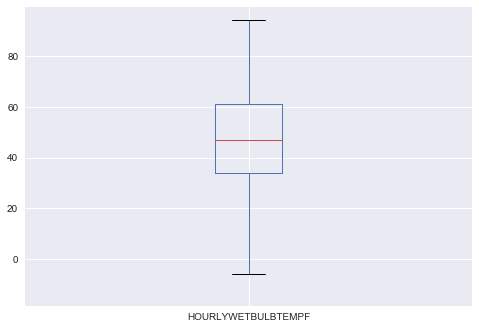

In [47]:
df=dataRB[['HOURLYWETBULBTEMPF']].convert_objects(convert_numeric=True)
# boxplot 
df.plot(kind='box')
plt.show()

# HOURLYWETBULBTEMPF & C 

Wetbulb temperature is calculated using drybulb and dewpoint reducing the null values from 83139 to 36606. The charater values are stripped.

In [38]:
dataRB.HOURLYWETBULBTEMPC.unique()

array([nan, '6.1', '6.9', '8.9', '11.1', '12.1', '13.3', '12.8', '13.2',
       '13.5', '11.2', '9.8', '9.3', '3.5', '1.9', '1', '0.9', '0', '-0.7',
       '-1.2', '-1.6', '-3.2', '-3.3', '-3.6', '-3.9', '-3.8', '-3.4',
       '-2.9', '-3', '-4', '-5.2', '-6.1', '-6.4', '-7', '-8.4', '-8.8',
       '-8.9', '-9.4', '-9.8', '-10.3', '-10.5', '-8.5', '-7.5', '-5.7',
       '-4.2', '-3.7', '-2.8', '-2.4', '-2.6', '-2', '-1.3', '-0.4', '2.7',
       '3.4', '3.8', '3.9', '5', '4.9', '4.5', '4.2', '1.8', '0.5', '0.4',
       '-0.5', '-1.5', '-5.8', '-7.1', '-8.1', '-7.6', '-7.7', '-7.2',
       '-6.7', '-6.3', '-6.2', '-8.7', '-9.1', '-9.7', '-10.1', '-10.2',
       '-10.7', '-11.1', '-11', '-11.5', '-12', '-12.1', '-12.6', '-14',
       '-14.6', '-13.6', '-11.6', '-10.4', '-12.5', '-13.1', '-13.5',
       '-13', '-11.9', '-11.3', '-10.6', '-9.5', '-9.9', '-8.6', '-7.4',
       '-6.8', '-6.6', '-6', '-5.6', '-5.4', '-4.9', '-2.7', '-2.2',
       '-2.3', '-2.5', '-1', '-0.9', '-0.1', '0.2', '-

In [35]:
dataRB.HOURLYWETBULBTEMPC.isnull().sum()

36606

In [ ]:
dataRB['HOURLYWETBULBTEMPC'].value_counts().plot(kind='hist',orientation='horizontal', cumulative=True)
plt.show()

# HOURLYDewPointTempF &  # HOURLYDewPointTempC      

Charater values stripped and nulls interpolated where ever possible.

In [36]:
# unique values
dataRB.HOURLYDewPointTempF.unique()

array(['36.0', '37.0', '34.0', '32.0', '30.0', '31.0', '33.0', '41.0',
       '40.0', '38.0', '26.0', '25.0', '23.0', '24.0', '20.0', '22.0',
       '21.0', '29.0', '27.0', '43.0', '42.0', '7.0', '5.0', '3.0', '1.0',
       '0.0', '-6.0', '4.0', '8.0', '10.0', '12.0', '13.0', '-9.0',
       '-11.0', '-12.0', '-15.0', '15.0', '6.0', '11.0', '18.0', '17.0',
       '14.0', '16.0', '35.0', '-1.0', '-4.0', '-5.0', '-7.0', '-3.0',
       '-17.0', '-10.0', '-18.0', '-13.0', '-8.0', '39.0', '44.0', '46.0',
       '2.0', '47.0', '49.0', '52.0', '53.0', '48.0', '50.0', '45.0',
       '55.0', '56.0', '58.0', '54.0', '57.0', '51.0', '59.0', '60.0',
       '61.0', '62.0', '63.0', '64.0', '66.0', '65.0', '69.0', '75.0',
       '72.0', '73.0', '74.0', '-19.0', '-16.0', '-22.0', '-24.0', '-26.0',
       '-20.0', '67.0', '68.0', '70.0', '71.0', '76.0', '77.0', nan,
       '-29.0', '19.0', '28.0', '-2.0', '9.0', '-14.0', '-23.0', '-21.0',
       '-27.0', '-25.0', '-28.0', '-30.0', '-36.0', '-31.0', '78.

In [37]:
# number of null values not zero 
dataRB.HOURLYDewPointTempF.isnull().sum()

24485

C:\Users\Manasi\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning:

convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.



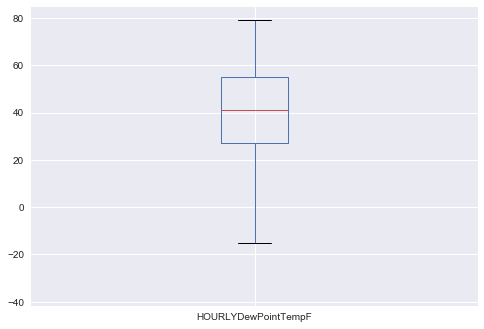

In [38]:
df=dataRB[['HOURLYDewPointTempF']].convert_objects(convert_numeric=True)
# boxplot 
df.plot(kind='box')
plt.show()

In [57]:
#count 
dataRB['HOURLYDewPointTempC'].count()

695610

In [53]:
#value counts
dataRB['HOURLYDewPointTempC'].value_counts()

0         14074
15        13282
10        13201
13.9      12733
14.4      12720
13.3      12670
12.8      12415
15.6      12307
12.2      12246
11.7      12091
0.6       11750
11.1      11737
1.1       11642
16.1      11552
10.6      11547
1.7       11502
16.7      11485
-0.6      11306
8.9       11292
8.3       11253
2.2       11211
2.8       11159
7.8       11053
3.3       11049
4.4       11046
7.2       11024
17.2      10969
9.4       10947
-1.1      10943
5         10820
          ...  
-8.0s         1
-2.2s         1
3.6           1
15.6s         1
7.3           1
4.7           1
-10.5         1
-15.0s        1
-2.3          1
7.0s          1
18.0s         1
0.7           1
-12.6         1
-6.3          1
16.7s         1
-27.5         1
-12.1         1
-2.9          1
22.5          1
7.9           1
-22.6s        1
-11.1s        1
-31           1
20.7          1
0.6s          1
21.5          1
26            1
-34.4         1
-25.9         1
24.1          1
Name: HOURLYDewPointTemp

In [58]:
# unique values
dataRB.HOURLYDewPointTempC.unique()

array(['2.4', '3', '1.3', '0.2', '-0.9', '-0.4', '0.8', '5.2', '4.6',
       '3.5', '-3.1', '-3.7', '-4.8', '-4.2', '-6.5', '-5.3', '-5.9',
       '-1.5', '-2.6', '6.3', '5.8', '-13.7', '-14.8', '-15.9', '-17',
       '-17.6', '-20.9', '-15.3', '-13.1', '-12', '-10.9', '-10.3',
       '-22.6s', '-23.7', '-24.2', '-25.9', '-9.2', '-14.2', '-11.5',
       '-7.6', '-8.1', '-9.8', '-8.7', '1.9', '-18.1', '-19.8', '-20.3',
       '-21.4', '-19.2', '-27', '-23.1', '-27.5', '-24.8', '-22', '4.1',
       '6.9', '8', '-16.4', '8.5', '9.6', '11.3', '11.9', '9.1', '10.2',
       '7.4', '13', '13.5', '14.6', '12.4', '14.1', '10.7', '15.2', '15.7',
       '16.3', '16.9', '17.4', '18', '19.1', '18.5', '20.7', '24.1',
       '22.4', '23', '23.5', '6.1', '6.7', '8.9', '11.1', '11.7', '12.2',
       '12.8', '13.3', '10', '1.7', '0', '-2.8', '-3.3', '-3.9', '-5',
       '-5.6', '-7.8', '-8.3', '-9.4', '-8.9', '-6.7', '-10.6', '-13.3',
       '-13.9', '-12.2', '-14.4', '-15', '-16.7', '-15.6', '-18.3',
 

In [59]:
# number of null values not zero 
dataRB.HOURLYDewPointTempF.isnull().sum()

29013

C:\Users\Manasi\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning:

convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.



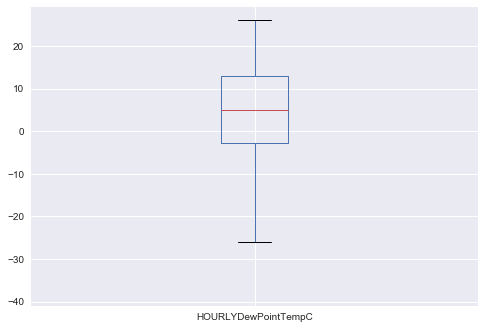

In [62]:
df=dataRB[['HOURLYDewPointTempC']].convert_objects(convert_numeric=True)
# boxplot 
df.plot(kind='box')
plt.show()

In [50]:
df=dataRB.head(30)

# HOURLYRelativeHumidity              

In [ ]:
Charater values stripped and nulls interpolated where eever possible.

In [65]:
# unique values
dataRB.HOURLYRelativeHumidity.unique()

array(['82', '93', '86', '76', '65', '58', '56', '80', '66', '71', '85',
       '79', '49', '41', '34', '31', '27', '22', '23', '26', '30', '39',
       '38', '42', '51', '61', '89', '45', '46', '63', '70', '68', '67',
       '62', '55', '83', '74', '59', '57', '36', '64', '48', '77', '84',
       '33', '29', '35', '73', '54', '32', '78', '72', '69', '60', '50',
       '40', '43', '37', '52', '53', '75', '44', '21', '28', '92', '47',
       '25', '96', '97', '100', '20', '90', '87', '81', '91', '88', '24',
       '18', '17', '94', '19', '14', '16', '15', '13', '12', '11', nan,
       '9', '10', '6', '7', '8', '95', '99', '102', '98', '104', '101',
       '103', '*'], dtype=object)

In [52]:
# number of null values not zero 
dataRB.HOURLYRelativeHumidity.isnull().sum()

24497

C:\Users\Manasi\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning:

convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.



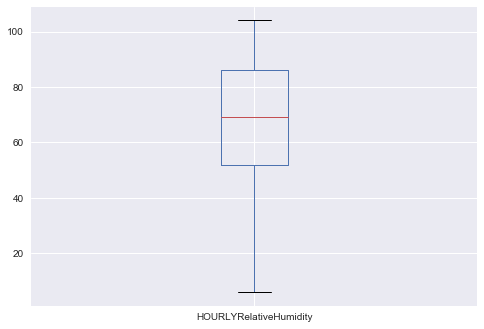

In [54]:
df=dataRB[['HOURLYRelativeHumidity']].convert_objects(convert_numeric=True)
# boxplot 
df.plot(kind='box')
plt.show()

# HOURLYWindSpeed 

Replacing charater values with numeric reduced number of nulls vastly. While cleaning the remaining null values do not replace by 0 as it is read as calm winds and is a valid value. Max wind speed is betwwen 5 to 15 mph

In [101]:
# unique values
dataRB.HOURLYWindSpeed.unique()

array(['8.0', '10.0', '6.0', '5.0', '2.0', '7.0', '11.0', '3.0', '14.0',
       nan, '9.0', '15.0', '17.0', '18.0', '22.0', '13.0', '29.0', '32.0',
       '34.0', '19.0', '24.0', '16.0', '0.0', '25.0', '28.0', '26.0',
       '21.0', '60.0', '1.0', '12.0', '33.0', '38.0', '41.0', '45.0',
       '20.0', '23.0', '30.0', '35.0', '36.0', '37.0', '31.0', '39.0',
       '40.0', '43.0', '56.0', '49.0', '55.0', '58.0', '52.0', '48.0',
       '27.0', '44.0', '46.0', '54.0', '53.0', '70.0', '86.0', '51.0',
       '47.0', '4.0', '57.0', '66.0', '62.0'], dtype=object)

In [99]:
# number of null values 
dataRB.HOURLYWindSpeed.isnull().sum()

1203

C:\Users\Manasi\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning:

convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.



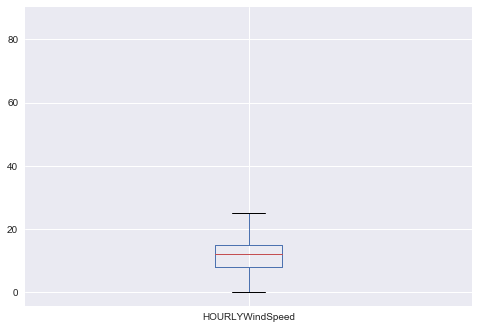

In [56]:
df=dataRB[['HOURLYWindSpeed']].convert_objects(convert_numeric=True)
# boxplot 
df.plot(kind='box')
plt.show()

In [105]:
dataRB['HOURLYWindSpeed'].value_counts(sort=True)

9.0     64141
10.0    60245
8.0     57472
12.0    53019
14.0    52756
13.0    52097
7.0     49396
15.0    43168
6.0     39268
16.0    36041
17.0    30693
5.0     27492
18.0    25393
3.0     18788
11.0    17791
20.0    16226
21.0    14083
0.0     11528
23.0     9457
22.0     9148
24.0     5194
25.0     4787
26.0     3742
2.0      3189
28.0     2564
29.0     2181
30.0     1612
19.0     1488
4.0      1000
31.0      962
        ...  
35.0      511
33.0      493
36.0      257
37.0      256
38.0      163
39.0      132
34.0      129
40.0      106
41.0       74
43.0       36
44.0       32
27.0       28
46.0       24
48.0       21
45.0       19
49.0       14
51.0        9
53.0        7
47.0        7
54.0        6
56.0        4
52.0        3
58.0        3
55.0        3
60.0        3
70.0        2
57.0        1
66.0        1
86.0        1
62.0        1
Name: HOURLYWindSpeed, dtype: int64

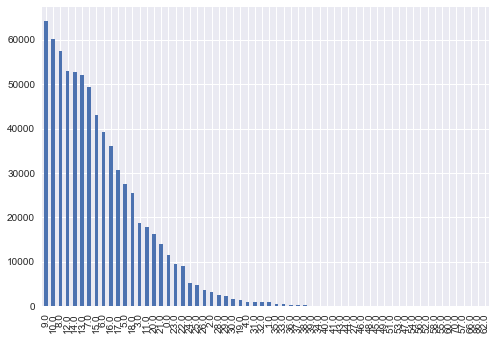

In [103]:
dataRB['HOURLYWindSpeed'].value_counts().plot(kind='bar')
plt.show()

# HOURLYWindDirection              

wind direction varies between 0 to 360 degrees with a max of 270 degrees clockwise. The VRB values are replace by -1 to make the column numeric

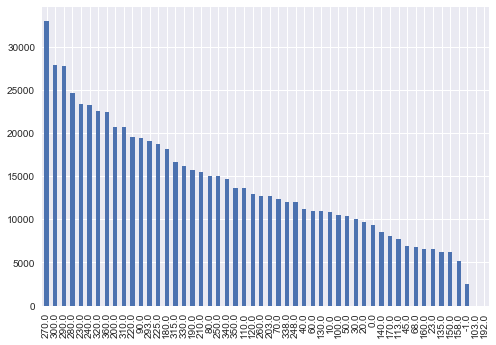

In [58]:
#value counts
dataRB['HOURLYWindDirection'].value_counts().plot(kind='bar')
plt.show()

In [107]:
# unique values
dataRB.HOURLYWindDirection.unique()

array(['315.0', '270.0', '338.0', '293.0', '360.0', '45.0', '90.0',
       '113.0', '68.0', '135.0', '248.0', '225.0', '203.0', nan, '23.0',
       '180.0', '0.0', '158.0', '230.0', '310.0', '30.0', '340.0', '70.0',
       '220.0', '250.0', '240.0', '10.0', '50.0', '20.0', '350.0', '80.0',
       '110.0', '210.0', '260.0', '280.0', '300.0', '120.0', '150.0',
       '170.0', '200.0', '190.0', '290.0', '330.0', '140.0', '130.0',
       '160.0', '320.0', '40.0', '60.0', '100.0', '-1.0', '192.0', '103.0'], dtype=object)

In [59]:
# number of null values not zero 
dataRB.HOURLYWindDirection.isnull().sum()

3466

C:\Users\Manasi\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning:

convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.



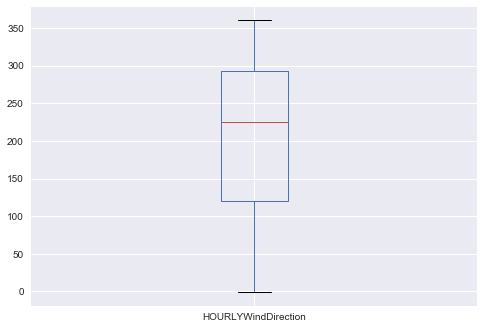

In [60]:
df=dataRB[['HOURLYWindDirection']].convert_objects(convert_numeric=True)
# boxplot 
df.plot(kind='box')
plt.show()

# HOURLYWindGustSpeed 
max gust speed is 23 mph. 

In [187]:
#value counts
dataRB['HOURLYWindGustSpeed'].value_counts()

22    1820
21    1677
20    1664
23    1642
24    1465
25    1373
18    1215
26    1057
28     920
17     798
29     702
30     563
31     456
16     373
32     342
33     282
34     236
36     178
37     129
38     101
39      98
40      88
41      55
43      39
44      27
45      24
46      13
*       13
47      11
48      10
49       9
54       8
52       4
55       4
56       3
19       3
53       2
51       2
63       2
72       2
75       2
59       1
60       1
69       1
66       1
82       1
67       1
61       1
70       1
77       1
Name: HOURLYWindGustSpeed, dtype: int64

In [110]:
# unique values
dataRB.HOURLYWindGustSpeed.unique()

array([nan, '26.0', '28.0', '30.0', '33.0', '24.0', '34.0', '29.0', '23.0',
       '25.0', '22.0', '32.0', '37.0', '40.0', '39.0', '31.0', '44.0',
       '45.0', '41.0', '38.0', '21.0', '19.0', '51.0', '46.0', '36.0',
       '48.0', '16.0', '53.0', '18.0', '49.0', '43.0', '17.0', '14.0',
       '11.0', '15.0', '13.0', '47.0', '55.0', '54.0', '57.0', '60.0',
       '56.0', '52.0', '62.0', '59.0', '64.0', '74.0', '69.0', '66.0',
       '20.0', '61.0', '71.0', '63.0', '68.0', '70.0', '35.0', '27.0',
       '50.0', '42.0', '76.0', '98.0'], dtype=object)

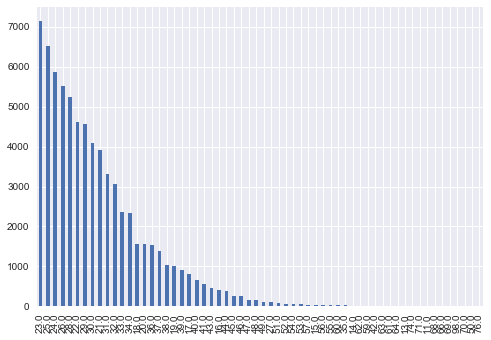

In [61]:
#value counts
dataRB['HOURLYWindGustSpeed'].value_counts().plot(kind='bar')
plt.show()

# HOURLYStationPressure 
varies between 29 to 30.5 Hg

In [62]:
# unique values
dataRB.HOURLYStationPressure.unique()

array([nan, '29.68', '29.64', '29.62', '29.57', '29.5', '29.42', '29.36',
       '29.3', '29.23', '29.14', '29.06', '29.04', '29.02', '28.99',
       '29.03', '29.13', '29.22', '29.32', '29.41', '29.52', '29.61',
       '29.67', '29.74', '29.8', '29.88', '29.92', '29.94', '29.96',
       '30.0', '30.03', '30.01', '30.14', '30.18', '30.21', '30.26',
       '30.27', '30.31', '30.33', '30.35', '30.36', '30.38', '30.39',
       '30.42', '30.41', '30.3', '30.34', '30.32', '30.29', '30.28',
       '30.24', '30.2', '30.16', '30.11', '30.09', '30.07', '30.05',
       '30.02', '29.98', '29.93', '29.95', '30.04', '30.06', '30.08',
       '30.1', '30.12', '30.15', '30.19', '30.23', '29.97', '29.91',
       '29.85', '29.81', '29.77', '29.72', '29.65', '29.69', '29.7',
       '29.73', '29.75', '29.78', '29.79', '29.76', '29.83', '29.66',
       '29.71', '29.82', '29.84', '29.87', '29.9', '30.25', '30.37',
       '30.22', '29.89', '29.99', '30.13', '30.17', '29.47', '29.43',
       '29.39', '29.35',

In [63]:
# number of null values not zero 
dataRB.HOURLYStationPressure.isnull().sum()

56172

C:\Users\Manasi\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning:

convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.



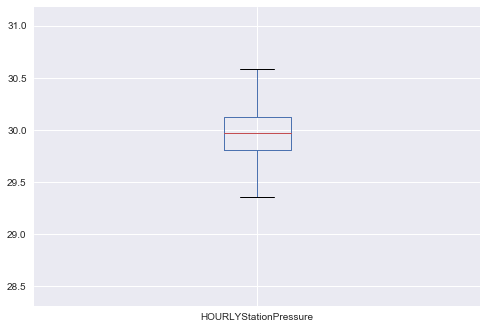

In [116]:
df=dataRB[['HOURLYStationPressure']].convert_objects(convert_numeric=True)
# boxplot 
df.plot(kind='box')
plt.show()

# HOURLYPressureTendency: nan             

In [65]:
#value counts
dataRB['HOURLYPressureTendency'].value_counts()

8.0    33010
3.0    32733
1.0    31176
6.0    22886
2.0    12330
7.0    11905
5.0    11186
0.0    10266
4.0     1449
Name: HOURLYPressureTendency, dtype: int64

In [196]:
# unique values
dataRB.HOURLYPressureTendency.unique()

array([nan, '0', '2', '3', '1', '8', '5', '6', '7', '4'], dtype=object)

In [66]:
# number of null values not zero 
dataRB.HOURLYPressureTendency.isnull().sum()

553295

# HOURLYPressureChange              

In [117]:
# unique values
dataRB.HOURLYPressureChange.unique()

array(['0.0', nan, '-0.04', '-0.02', '0.05', '0.01', '0.07', '0.02',
       '0.03', '-0.07', '-0.06', '0.1', '-0.03', '-0.08', '-0.1', '-0.01',
       '0.14', '0.22', '0.06', '0.04', '0.09', '0.11', '-0.12', '-0.05',
       '-0.11', '0.19', '0.12', '0.25', '-0.0', '0.13', '0.08', '-0.13',
       '-0.15', '-0.14', '0.21', '-0.18', '-0.19', '-0.09', '-0.17',
       '0.16', '0.23', '0.17', '0.15', '0.18', '0.2', '-0.16', '-0.22',
       '-0.29', '-0.23', '-0.28', '0.26', '0.32', '0.28', '0.48', '-0.3',
       '-0.38', '-0.27', '-0.25', '-0.21', '0.24', '0.29', '-0.24', '0.33',
       '0.27', '0.46', '-0.26', '-0.2', '0.31', '0.34', '0.3', '0.36',
       '-0.35', '0.37', '0.44', '-0.59', '0.43', '0.41', '0.68', '0.35',
       '-0.92', '0.4', '0.39'], dtype=object)

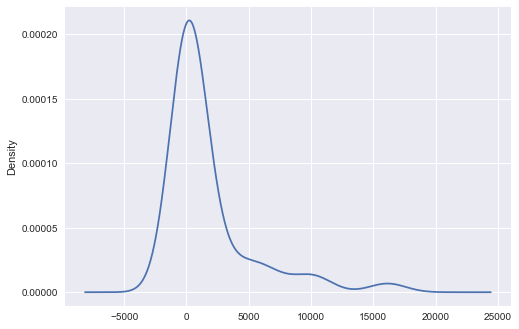

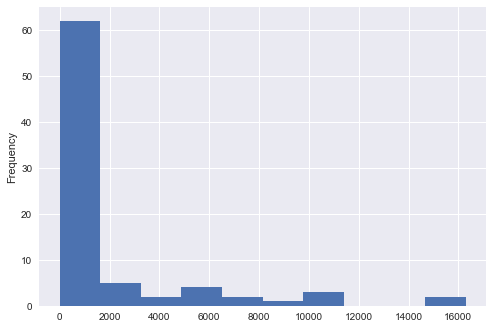

In [118]:
dataRB['HOURLYPressureChange'].value_counts().plot(kind='kde')
plt.show()
dataRB['HOURLYPressureChange'].value_counts().plot(kind='hist')
import matplotlib.pyplot as pltd
pltd.show()

C:\Users\Manasi\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning:

convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.



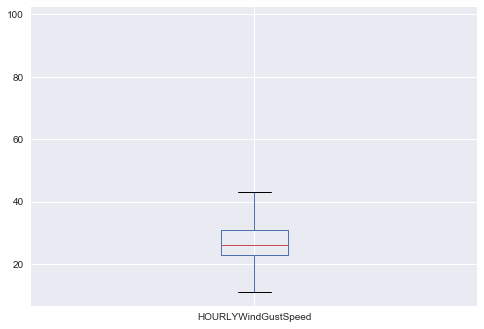

In [70]:
df=dataRB[['HOURLYWindGustSpeed']].convert_objects(convert_numeric=True)
# boxplot 
df.plot(kind='box')
plt.show()

# HOURLYSeaLevelPressure             

In [203]:
#value counts
dataRB['HOURLYSeaLevelPressure'].value_counts()

30.01     1770
29.96     1760
29.99     1708
30.09     1632
30.12     1616
29.94     1614
30.04     1612
29.91     1581
30.14     1568
30.06     1566
30.17     1474
29.88     1454
30.19     1383
29.86     1345
30        1315
29.95     1278
29.97     1256
30.03     1253
30.02     1248
29.83     1236
29.93     1235
30.08     1233
29.98     1217
30.05     1213
30.13     1209
30.07     1205
29.92     1196
30.1      1186
30.11     1182
30.15     1163
          ... 
29.06        1
29.35s       1
29.13s       1
29.68s       1
29.09        1
28.95s       1
29.30s       1
29.33s       1
29.02s       1
29.76s       1
29.01s       1
29.47s       1
29.08s       1
28.93        1
29.19s       1
29.65s       1
28.96s       1
29.22s       1
29.37s       1
29.64s       1
29.04s       1
29.06s       1
28.95        1
28.92        1
28.88s       1
30.86        1
29.02        1
29.09s       1
29.26s       1
28.97        1
Name: HOURLYSeaLevelPressure, dtype: int64

In [204]:
# unique values
dataRB.HOURLYSeaLevelPressure.unique()

array([nan, '29.96', '29.97', '29.99', '30.01', '30.02', '30.03', '30.05',
       '30.07', '30.09', '30.1', '30.11', '30.12', '30.13', '30.14',
       '30.16', '30.17', '30.18', '30.19', '30.21', '30.2', '30.15',
       '30.04', '30', '29.94', '29.92', '29.91', '29.9', '29.88', '29.87',
       '29.85', '29.83', '29.86', '29.84', '29.82', '29.8', '29.81',
       '29.77', '29.76', '29.74', '29.78', '29.89', '29.75', '29.73',
       '29.79', '29.93', '29.95', '29.98', '29.71', '29.72', '29.7',
       '29.69', '30.06', '29.67', '29.68', '29.66', '29.64', '29.65',
       '29.62', '29.63', '30.22', '30.23', '30.24', '30.25', '30.26',
       '30.08', '29.6', '29.59', '29.58', '30.27', '30.28', '30.29',
       '30.3', '30.33', '30.35', '30.34', '30.32', '30.31', '30.36',
       '30.37', '30.38', '30.39', '30.4', '30.42', '30.43', '30.44',
       '30.46', '30.47', '30.49', '30.5', '30.48', '30.45', '30.51',
       '30.52', '30.53', '30.55', '30.56', '30.57', '30.58', '30.54',
       '30.59', '2

In [205]:
# number of null values not zero 
dataRB.HOURLYSeaLevelPressure.isnull().sum()

35103

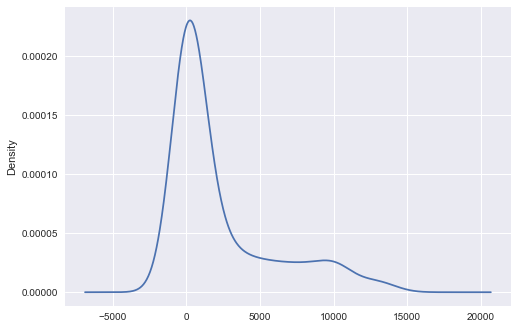

In [119]:
dataRB['HOURLYSeaLevelPressure'].value_counts().plot(kind='kde')
plt.show()


# HOURLYPrecip                     

In [71]:
# unique values
dataRB.HOURLYPrecip.unique()

array([nan, '0.0', '0.01', '0.06', '0.07', '0.05', '0.14', '0.08', '0.13',
       '0.16', '0.17', '0.02', '0.03', '0.04', '0.09', '0.15', '0.1',
       '0.23', '0.18', '0.2', '0.12', '0.26', '0.33', '0.11', '0.32',
       '0.25', '0.19', '0.22', '0.39', '0.24', '0.59', '0.49', '0.27',
       '0.96', '0.35', '0.31', '0.21', '0.45', '0.43', '1.58', '0.28',
       '0.3', '0.29', '0.4', '0.56', '0.34', '0.36', '0.37', '0.38',
       '0.67', '0.63', '0.44', '0.74', '0.52', '0.6', '0.5', '1.63',
       '0.94', '0.55', '0.46', '0.66', '0.51', '0.58', '0.42', '0.68',
       '0.92', '0.98', '0.57', '1.05', '0.48', '0.61', '1.22', '0.47',
       '0.85', '1.04', '1.6', '0.95', '1.03', '1.2', '1.09', '1.41', '1.1',
       '0.77', '0.7', '0.81', '0.97', '0.41', '1.07', '0.53', '0.82',
       '1.54', '0.54', '0.65', '0.75', '0.72', '0.69', '0.89', '0.62',
       '0.88', '0.76', '0.8', '0.64', '0.93', '1.0', '1.08', '0.9', '0.73',
       '2.03', '0.78', '0.84', '0.005', '1.34', '1.31', '0.91', '6.0',

In [72]:
# number of null values not zero 
dataRB.HOURLYSeaLevelPressure.isnull().sum()

56401

C:\Users\Manasi\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning:

convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.



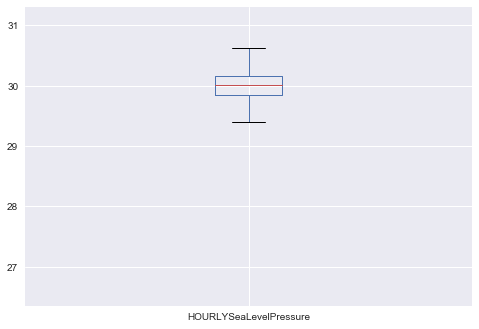

In [73]:
df=dataRB[['HOURLYSeaLevelPressure']].convert_objects(convert_numeric=True)
# boxplot 
df.plot(kind='box')
plt.show()

# HOURLYAltimeterSetting 
has bulk null values. Can be cleaned by interpolation models

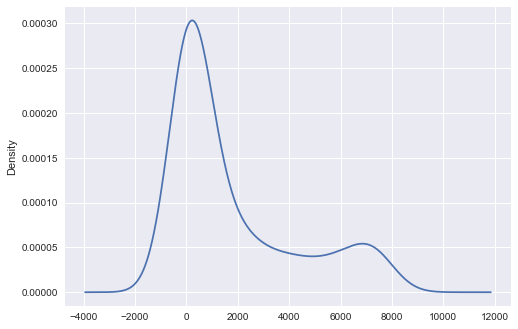

In [74]:
#value counts
dataRB['HOURLYAltimeterSetting'].value_counts().plot(kind='kde')
plt.show()

In [212]:
# unique values
dataRB.HOURLYAltimeterSetting.unique()

array(['29.93', '29.92', '29.94', '29.96', '29.97', '29.98', '29.99',
       '30.01', '30.03', '30.05', '30.06', '30.07', nan, '30.08', '30.09',
       '30.1', '30.11', '30.12', '30.13', '30.14', '30.15', '30.17',
       '30.16', '30.02', '29.95', '29.9', '29.89', '29.88', '29.87',
       '29.85', '29.84', '29.83', '29.81', '29.8', '29.79', '29.82',
       '29.77', '29.76', '29.78', '29.74', '29.73', '29.71', '29.75',
       '29.86', '29.72', '29.7', '29.91', '29.68', '29.69', '29.67',
       '29.66', '30', '29.65', '29.64', '29.63', '29.62', '29.61', '29.6',
       '29.59', '30.18', '30.19', '30.2', '30.21', '30.22', '30.04',
       '29.58', '29.57', '29.56', '29.55', '30.23', '30.24', '30.25',
       '30.26', '30.29', '30.3', '30.28', '30.27', '30.32', '30.31',
       '30.33', '30.34', '30.35', '30.36', '30.37', '30.38', '30.4',
       '30.41', '30.43', '30.44', '30.45', '30.42', '30.39', '30.47',
       '30.48', '30.49', '30.51', '30.52', '30.53', '30.54', '30.5',
       '30.55', '3

C:\Users\Manasi\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning:

convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.



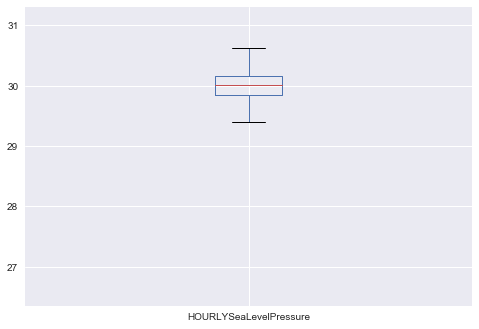

In [76]:
df=dataRB[['HOURLYSeaLevelPressure']].convert_objects(convert_numeric=True)
# boxplot 
df.plot(kind='box')
plt.show()

In [90]:
datac=dataRB[['HOURLYDRYBULBTEMPF','HOURLYWETBULBTEMPF','HOURLYDewPointTempF','HOURLYRelativeHumidity']].convert_objects(convert_numeric=True)

C:\Users\Manasi\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':


# This part contains EDA on the data starting for column 26: the daily monthly summary

## The daily/monthly summary columns and monthly columns are eliminated to keep the hourly data consistent.
 ## pros
* consistent hourly data for analysis
* sumary data can always be calculated back from the hourly data
## cons
* user looses ability to query directly on calculated summary data

In [77]:
dailySummaryData=dataRB.iloc[:,26:48]
dailySummaryData.isnull().sum()


DAILYSunrise    0
DAILYSunset     0
dtype: int64

In [78]:
monthlySummaryData=dataRB.iloc[:,49:]
monthlySummaryData.isnull().sum()

Series([], dtype: float64)